<a href="https://colab.research.google.com/github/RehamJamal13/model/blob/main/CoAuthor_Networking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title Download pakages
#NATURAL LANGUAGE PROCESSING
!pip install pandas
!pip install networkx
!pip install matplotlib
! pip install pyvis
!pip install nameparser

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 KB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#@title Load Packages
#!pip install nameparser
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
#from Topic_Modeling import *
#import scispacy
#import spacy
#import en_core_sci_lg
import networkx as nx
from pathlib import Path
from itertools import combinations
from collections import Counter
from itertools import chain
import random
from pyvis.network import Network
from nameparser import HumanName
import json

In [ ]:
#@title Load Data
df= pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Copy_of_Author_paper.csv')

In [ ]:
def key_name(name):
    # parse name
    parsed = HumanName(name)
    if len(parsed.first) > 0 and len(parsed.last) > 0:
        first_name = parsed.first[0]
        # Key is lowercased
        key = f"{parsed.last.lower()} {first_name.lower()}"
        return key
    else:
        return name.lower()

In [ ]:
def load_authors(db):
    authors = dict()
    db.index = np.arange(1,len(db)+1)
    for entrie in db.index:
        names = db.loc[entrie,"Author"]
        # Converting string to list
        names = names.replace("'", "")
        names = names.strip('][').split(', ')
        for author in names:
            name = author
            key = key_name(name)
            val = authors.get(key)
            #print(name)
            if isinstance(val, list) and name not in val:
                val.append(name)
            else:
                authors[key] = [name]
    return authors

In [ ]:
def _add_nodes(gx, database):
    id_node = 0
    authors = load_authors(database)
    correspondance = dict()
    for auth in authors:
        id_node += 1
        gx.add_node(id_node)
        correspondance[auth] = id_node
    return correspondance

In [ ]:
def _add_edges(gx, database, correspondance):
    database.index = np.arange(1,len(database)+1)
    for entrie in database.index:
        names = database.loc[entrie,"Author"]
        # Converting string to list
        names = names.replace("'", "")
        names = names.strip('][').split(', ')
        authors = []
        # Parse names
        for author in names:
            name = author
            authors.append(name)
        # Add all corresponding edges
        for name in authors:
            k1 = key_name(name)
            for coname in authors:
                k2 = key_name(coname)
                if k1 != k2:
                    o = correspondance[k1]
                    d = correspondance[k2]
                    gx.add_edge(o, d)

In [ ]:
def build_graph(database):
    gx = nx.Graph()
    correspondance = _add_nodes(gx, database)
    _add_edges(gx, database, correspondance)
    return gx, correspondance

In [ ]:
g = build_graph(df)


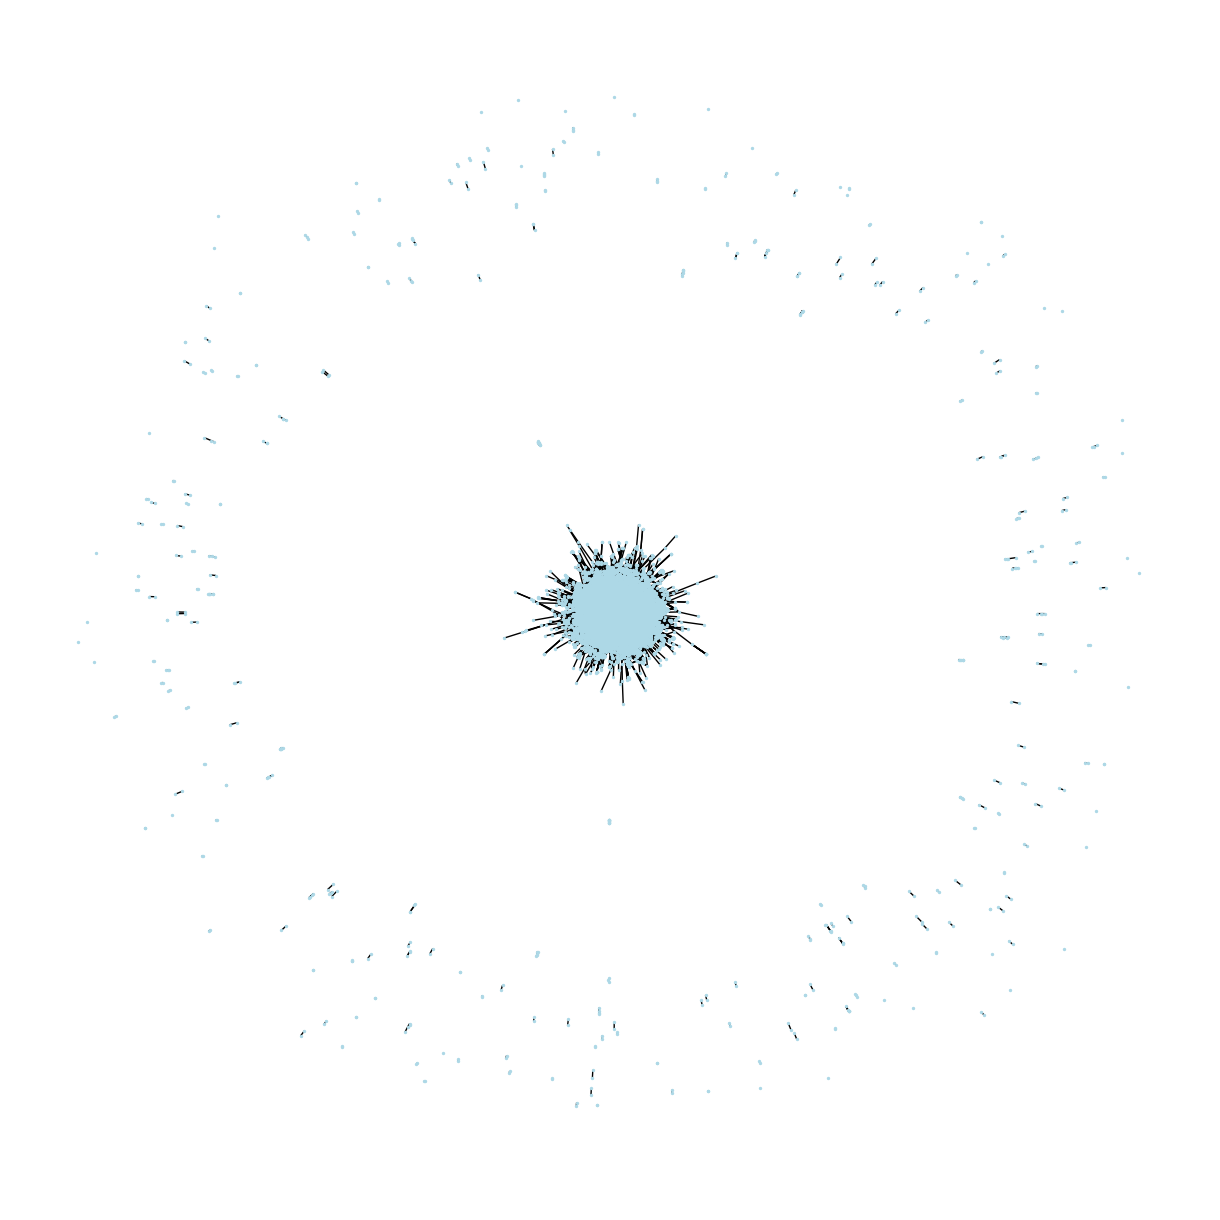

In [ ]:
import matplotlib.pyplot as plt
plt.figure(3,figsize=(12,12))
nx.draw(G, with_labels=False, node_size = 2, node_color = 'lightblue')

In [ ]:
G.number_of_nodes()


19504

In [ ]:
G.number_of_edges()

237931

In [ ]:
deg_measure = nx.degree(G)
cent_measure = nx.degree_centrality(G)
bet_measure = nx.betweenness_centrality(G)

In [ ]:
deg_measure

DegreeView({1: 0, 2: 5, 3: 5, 4: 164, 5: 5, 6: 99, 7: 2742, 8: 6, 9: 1701, 10: 238, 11: 593, 12: 433, 13: 484, 14: 87, 15: 237, 16: 43, 17: 487, 18: 49, 19: 8, 20: 159, 21: 299, 22: 50, 23: 152, 24: 47, 25: 613, 26: 97, 27: 224, 28: 4, 29: 816, 30: 8, 31: 463, 32: 91, 33: 25, 34: 1029, 35: 114, 36: 1222, 37: 286, 38: 3, 39: 61, 40: 10, 41: 13, 42: 431, 43: 886, 44: 8, 45: 104, 46: 39, 47: 8, 48: 43, 49: 355, 50: 1, 51: 1429, 52: 16, 53: 16, 54: 16, 55: 120, 56: 20, 57: 170, 58: 21, 59: 16, 60: 14, 61: 16, 62: 16, 63: 16, 64: 44, 65: 16, 66: 483, 67: 38, 68: 45, 69: 4, 70: 13, 71: 518, 72: 4, 73: 1, 74: 41, 75: 810, 76: 58, 77: 144, 78: 298, 79: 1724, 80: 108, 81: 18, 82: 81, 83: 9, 84: 8, 85: 17, 86: 63, 87: 87, 88: 8, 89: 15, 90: 25, 91: 88, 92: 43, 93: 10, 94: 26, 95: 85, 96: 10, 97: 10, 98: 47, 99: 11, 100: 5, 101: 49, 102: 379, 103: 9, 104: 31, 105: 6, 106: 6, 107: 42, 108: 6, 109: 282, 110: 1223, 111: 11, 112: 97, 113: 39, 114: 272, 115: 11, 116: 11, 117: 441, 118: 11, 119: 11, 12

In [ ]:
cent_measure

{1: 0.0,
 2: 0.00025637081474644925,
 3: 0.00025637081474644925,
 4: 0.008408962723683536,
 5: 0.00025637081474644925,
 6: 0.005076142131979696,
 7: 0.14059375480695277,
 8: 0.00030764497769573913,
 9: 0.08721735117674205,
 10: 0.012203250781930986,
 11: 0.030405578628928884,
 12: 0.022201712557042508,
 13: 0.02481669486745629,
 14: 0.0044608521765882175,
 15: 0.012151976618981696,
 16: 0.002204789006819464,
 17: 0.02497051735630416,
 18: 0.002512433984515203,
 19: 0.00041019330359431884,
 20: 0.008152591908937088,
 21: 0.015330974721837667,
 22: 0.002563708147464493,
 23: 0.007793672768292058,
 24: 0.002409885658616623,
 25: 0.03143106188791468,
 26: 0.004973593806081116,
 27: 0.011485412500640928,
 28: 0.00020509665179715942,
 29: 0.04183971696662052,
 30: 0.00041019330359431884,
 31: 0.023739937445521202,
 32: 0.004665948828385376,
 33: 0.0012818540737322465,
 34: 0.05276111367481926,
 35: 0.005845254576219043,
 36: 0.0626570271240322,
 37: 0.0146644106034969,
 38: 0.000153822488847

In [ ]:
bet_measure

{1: 0.0,
 2: 0.0,
 3: 0.0,
 4: 0.001426862882770963,
 5: 0.0,
 6: 0.0009414666161199401,
 7: 0.14753727213824705,
 8: 0.0,
 9: 0.06788794011419311,
 10: 0.0033193210513703846,
 11: 0.0023667828663682207,
 12: 0.007412294194989203,
 13: 0.005899153800785888,
 14: 0.0007474885059847609,
 15: 0.002852036272090378,
 16: 0.00013377453094341393,
 17: 0.004331701858708988,
 18: 0.00016789400628292142,
 19: 2.0517136954181905e-08,
 20: 0.0012064269897145788,
 21: 0.004839641508169474,
 22: 0.0003404996626533655,
 23: 0.0016019698176645732,
 24: 0.0003063323971583018,
 25: 0.012163927355468982,
 26: 0.00047316523904050793,
 27: 0.0035196721726721268,
 28: 0.0,
 29: 0.01077895455245513,
 30: 3.1263093076323716e-05,
 31: 0.010508662940799307,
 32: 0.0008328299596698146,
 33: 6.905857277124738e-05,
 34: 0.027274466112889084,
 35: 0.0013256652462882226,
 36: 0.04383390453234609,
 37: 0.002774491594888734,
 38: 0.0,
 39: 0.0001468899233387066,
 40: 3.935715519479345e-06,
 41: 1.051590024577857e-05,


In [ ]:
nx.write_graphml(G, "coauthors.graphml")

In [ ]:
load_authors(df)

["'zweygarth'", "' e. kaminsky'", "' r cheruiyot'", "' jk'"]


{"author' '": ["'Unknown author'"],
 "'-elgayoum'": ["'-elgayoum'"],
 "el-feki' '": ["' salwa. m. e. el-feki'"],
 "mahgoub' '": ["' e. a. mahgoub'",
  "' r mahgoub'",
  "' om mahgoub'",
  "' h.. a. mahgoub'",
  "' m. o. mahgoub'",
  "' a. h. mahgoub'",
  "' s. mahgoub'",
  "' edward w mahgoub'"],
 "el-rayah' '": ["' babiker ahmed. el-rayah'", "'a. elgayoum s. m. el-rayah'"],
 "giha' '": ["' g giha'",
  "' m giha'",
  "' nc giha'",
  "' nnaemeka c giha'",
  "' k giha'",
  "' j. a. giha'",
  "' m. i. giha'",
  "' l giha'",
  "' lars giha'",
  "' i. m. giha'",
  "' a. m. giha'",
  "' a. giha'"],
 "a.' '": ["' a.'"],
 "'a.'": ["'a.'"],
 "m.' '": ["' a. m.'", "' m.'", "' b. m.'"],
 "elamin' '": ["' c elamin'", "' m. h. elamin'", "' q elamin'"],
 "younis' '": ["' mma younis'", "' h. younis'", "' hania younis'"],
 "musa' '": ["' m musa'", "' t. p. musa'", "' f. musa'", "' g.. a. musa'"],
 "elhassan' '": ["' a. elhassan'",
  "' k elhassan'",
  "' m elhassan'",
  "' t elhassan'",
  "' o. s. elh

##Save Graph

In [ ]:
# save results
import pickle

# save graph object to file
pickle.dump(G, open('/content/drive/MyDrive/Colab_Notebooks/coAuthorNetworh.pickle', 'wb'))



In [ ]:
#another way
# saving graph created above in gexf format
nx.write_gexf(G, "/content/drive/MyDrive/Colab_Notebooks/coAuthorNetworh2.gexf")